In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2


In [16]:
# Load your dataset
# Assuming your dataset is a CSV file. Replace with your file path.
df = pd.read_csv('binary.arff.csv')
df2 = pd.read_csv('feature_importances_sorted.csv')

In [13]:
df

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,CLASS
0,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,1023,67,214,-135,1074,475,48,168,-70,ALL
1,-87,-248,262,295,-226,-493,367,-452,194,162,...,529,-295,352,-67,67,263,-33,-33,-21,ALL
2,-62,-23,-7,142,-233,-284,-167,-97,-12,-70,...,383,46,104,15,245,164,84,100,-18,ALL
3,22,-153,17,276,-211,-250,55,-141,0,500,...,399,16,558,24,893,297,6,1971,-42,ALL
4,86,-36,-141,252,-201,-384,-420,-197,-60,-468,...,91,-84,615,-52,1235,9,7,1545,-81,ALL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,-20,-207,-50,101,-369,-529,14,-365,153,29,...,1009,-55,139,-57,834,557,-12,335,-65,AML
68,7,-100,-57,132,-377,-478,-351,-290,283,247,...,336,-45,170,12,752,295,28,1558,-67,AML
69,-213,-252,136,318,-209,-557,40,-243,119,-131,...,1653,67,486,-88,1293,342,26,246,23,AML
70,-25,-20,124,325,-396,-464,-221,-390,-1,358,...,486,-32,334,35,1733,304,12,3193,-33,AML


In [17]:
df2

,Feature,Importance
0,M84526_at,0.027566
1,M31523_at,0.021751
2,D88422_at,0.020601
3,X61587_at,0.018948
4,M63138_at,0.017107
...,...,...
7124,S46622_at,0.000000
7125,S45630_at,0.000000
7126,S43646_at,0.000000
7127,S42457_at,0.000000


In [14]:

# Separate features (X) and target variable (y)
X = df.drop('CLASS', axis=1)  # Replace 'CLASS' with the actual name of your target column
y = df['CLASS']

# Apply SelectKBest to select top 10 features
selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support(indices=True)]
print("Selected features:", selected_features)

# Now you can use X_new for further modeling


ValueError: Input X must be non-negative.

In [ ]:


# Separate features (X) and target variable (y)
X = df.drop('CLASS', axis=1)  # Replace 'CLASS' with the actual name of your target column
y = df['CLASS']

# Initialize and train the RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# # Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Separate features (X) and target variable (y)
X = df.drop('CLASS', axis=1)
y = df['CLASS']

# Initialize and train the RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Select the top n features (e.g., 20)
n = 20
top_indices = indices[:n]
top_features = X.columns[top_indices]

# Plot the top n feature importances
plt.figure(figsize=(10, 8))
plt.title(f"Top {n} Feature Importances")
plt.bar(range(n), importances[top_indices], align="center")
plt.xticks(range(n), top_features, rotation=90)
plt.xlim([-1, n])
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Separate features (X) and target variable (y)
X = df.drop('CLASS', axis=1)
y = df['CLASS']

# Initialize and train the RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance in ascending order
feature_importances_sorted = feature_importances.sort_values(by='Importance', ascending=False)

# Save the sorted feature importances to a CSV file
feature_importances_sorted.to_csv('feature_importances_sorted.csv', index=False)

# Display the sorted DataFrame
print(feature_importances_sorted)


          Feature  Importance
2287    M84526_at    0.027566
6854    M31523_at    0.021751
759     D88422_at    0.020601
4365    X61587_at    0.018948
2120    M63138_at    0.017107
...           ...         ...
2438    S46622_at    0.000000
2437    S45630_at    0.000000
2436    S43646_at    0.000000
2435    S42457_at    0.000000
7128  Z78285_f_at    0.000000

[7129 rows x 2 columns]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the feature importance data from the CSV file
feature_importance_df = pd.read_csv('feature_importances_sorted.csv')

# Filter features with importance greater than 0.001
filtered_df = feature_importance_df[feature_importance_df['Importance'] > 0.001]

# Sort the filtered features by importance in descending order
filtered_df = filtered_df.sort_values(by='Importance', ascending=False)

# # Plot the filtered feature importances
# plt.figure(figsize=(10, ))
# plt.title("Feature Importances (Importance > 0.001)")
# plt.barh(filtered_df['Feature'], filtered_df['Importance'], align="center")
# plt.xlabel("Importance")
# plt.ylabel("Feature")
# plt.gca().invert_yaxis()  # Invert y-axis to show the highest importance at the top
# plt.show()


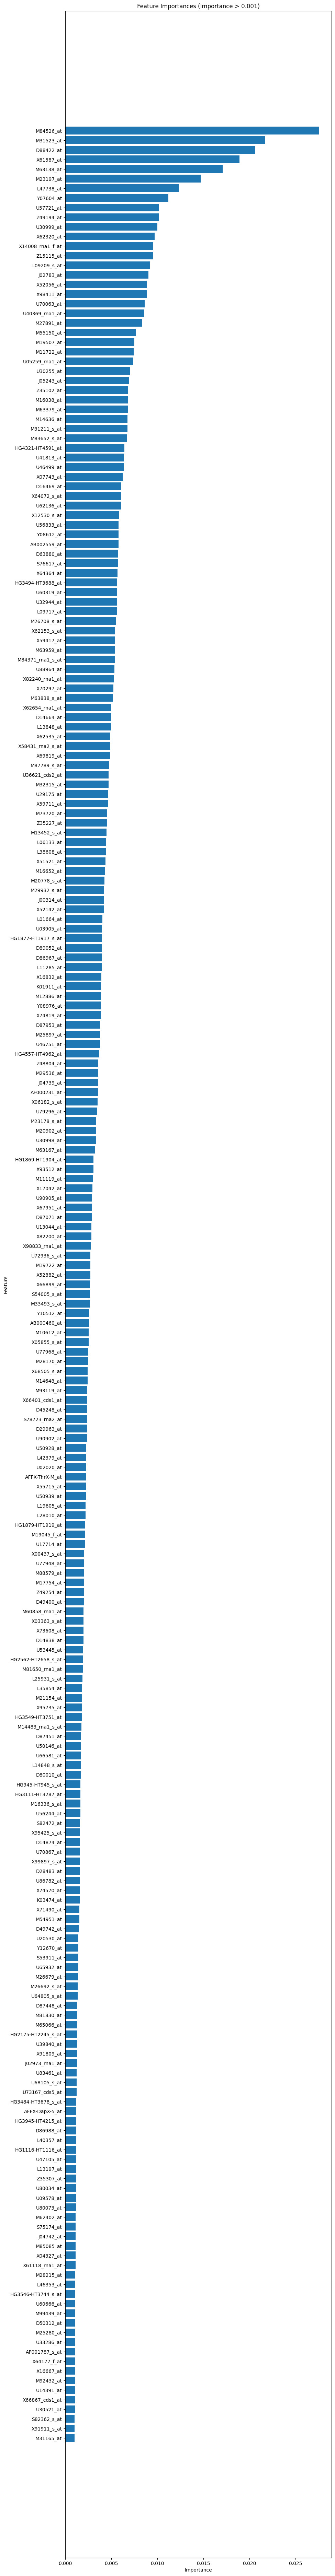

In [ ]:
# Determine the number of features to adjust the figure size
num_features = len(filtered_df)
fig_height = max(5, num_features * 0.4)  # Adjust height based on the number of features

# Plot the filtered feature importances
plt.figure(figsize=(10, fig_height))
plt.title("Feature Importances (Importance > 0.001)")
plt.barh(filtered_df['Feature'], filtered_df['Importance'], align="center")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Invert y-axis to show the highest importance at the top
plt.show()